### Import flight table

In [97]:
import psycopg2
import pandas as pd
import APIkey
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
pwd = APIkey.progre_key["password"]

In [36]:
con = psycopg2.connect(database="mid_term_project", user="lhl_student", password=pwd, host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com", port="5432")

In [37]:
sql = 'select fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_delay,crs_arr_time,arr_delay,cancelled,cancellation_code,crs_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay from flights'

In [38]:
#df_flight = pd.read_sql_query(sql,con) 

In [57]:
#df_flight.info()

In [31]:
columns = ['fl_date','op_unique_carrier','tail_num','op_carrier_fl_num','origin_airport_id','dest_airport_id','crs_dep_time','dep_delay','crs_arr_time','arr_delay','cancelled','cancellation_code','crs_elapsed_time','distance','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

### Facts about flights table
total records : 15927485 

total columns: 42
tail_num  is null:     49269
delay : 3009148 


### separate train data with needed features. data preparation. 

In [42]:

df_train = df_flight[['fl_date','op_unique_carrier','tail_num','op_carrier_fl_num','origin_airport_id','dest_airport_id','crs_dep_time','crs_arr_time','crs_elapsed_time','distance']]

In [58]:
df_train.isnull().sum()

fl_date                  0
op_unique_carrier        0
tail_num             49269
op_carrier_fl_num        0
origin_airport_id        0
dest_airport_id          0
crs_dep_time             0
crs_arr_time             0
crs_elapsed_time        20
distance                 0
dtype: int64

In [94]:
df_train.tail()

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance
15927480,2018-04-02,WN,N8632A,1833,12892,10821,1320,2130,310.0,2329.0
15927481,2018-04-02,WN,N8329B,1839,12892,10821,1025,1835,310.0,2329.0
15927482,2018-04-02,WN,N255WN,31,12892,11259,825,1325,180.0,1246.0
15927483,2018-04-02,WN,N786SW,1336,12892,11259,1815,2315,180.0,1246.0
15927484,2018-04-02,WN,N962WN,1436,12892,11259,510,1010,180.0,1246.0


In [96]:
# 'op_carrier_fl_num' and 'op_unique_carrier' identified unique flight
df_train[(df_train['op_carrier_fl_num'] == 1833) & (df_train['op_unique_carrier']=='WN')]

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance
20240,2018-04-03,WN,N8306H,1833,12892,10821,1320,2130,310.0,2329.0
35656,2018-04-04,WN,N8563Z,1833,12892,10821,1320,2130,310.0,2329.0
61654,2018-04-05,WN,N8647A,1833,12892,10821,1320,2130,310.0,2329.0
80084,2018-04-06,WN,N8683D,1833,12892,10821,1320,2130,310.0,2329.0
148279,2018-04-09,WN,N8526W,1833,13198,10397,940,1240,120.0,692.0
...,...,...,...,...,...,...,...,...,...,...
15826566,2018-09-27,WN,N441WN,1833,12889,10140,850,1120,90.0,486.0
15838195,2018-09-28,WN,N943WN,1833,12889,10140,850,1120,90.0,486.0
15849389,2018-09-28,WN,N419WN,1833,11066,12889,655,810,255.0,1771.0
15907659,2018-04-01,WN,N8677A,1833,12892,10821,1320,2130,310.0,2329.0


In [71]:
df_train.nunique()

fl_date               730
op_unique_carrier      28
tail_num             6487
op_carrier_fl_num    7252
origin_airport_id     376
dest_airport_id       376
crs_dep_time         1412
crs_arr_time         1437
crs_elapsed_time      693
distance             1623
dtype: int64

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927485 entries, 0 to 15927484
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fl_date            object 
 1   op_unique_carrier  object 
 2   tail_num           object 
 3   op_carrier_fl_num  int64  
 4   origin_airport_id  int64  
 5   dest_airport_id    int64  
 6   crs_dep_time       int64  
 7   crs_arr_time       int64  
 8   crs_elapsed_time   float64
 9   distance           float64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ GB


In [100]:
df_train2 = df_train.iloc[:1000000,:]

In [101]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fl_date              1000000 non-null  object 
 1   op_unique_carrier    1000000 non-null  object 
 2   tail_num             998428 non-null   object 
 3   op_carrier_fl_num    1000000 non-null  int64  
 4   origin_airport_id    1000000 non-null  int64  
 5   dest_airport_id      1000000 non-null  int64  
 6   crs_dep_time         1000000 non-null  int64  
 7   dep_delay            986911 non-null   float64
 8   crs_arr_time         1000000 non-null  int64  
 9   arr_delay            984307 non-null   float64
 10  cancelled            1000000 non-null  float64
 11  cancellation_code    12748 non-null    object 
 12  crs_elapsed_time     1000000 non-null  float64
 13  distance             1000000 non-null  float64
 14  carrier_delay        180344 non-null   float64
 15 

In [102]:
X_train, X_test = train_test_split(df, test_size=0.2) 

In [ ]:
y_test.to_csv('y_test')

## Lable data with all delays, data preparation.

In [66]:
#df_lable['total_delay'] = df_lable['carrier_delay'] + df_lable['weather_delay'] + df_lable['nas_delay'] + df_lable['security_delay'] + df_lable['late_aircraft_delay'] + df_lable['arr_delay'] + df_lable['dep_delay']

In [59]:
def is_delay(x):
    '''
    Generate a column to identify delay.
    input : total_delay
    output : bool 1 is delay, 0 is not.
    '''
    if x > 0:
        return 1
    else: 
        return 0

In [65]:
#df_lable['isdelay'] = df_lable['total_delay'].apply(is_delay)

In [64]:
df_lable['isdelay'].value_counts()

0    12918338
1     3009148
Name: isdelay, dtype: int64

### Analyze outliners of arr_delay

In [69]:
df_lable.describe()

,dep_delay,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,isdelay
count,1.566373e+07,1.561574e+07,1.592748e+07,3.009484e+06,3.009484e+06,3.009484e+06,3.009484e+06,3.009484e+06,3.009149e+06,1.592749e+07
mean,1.054971e+01,5.475932e+00,1.690210e-02,2.037512e+01,3.674443e+00,1.623685e+01,8.853279e-02,2.729212e+01,1.983783e+02,1.889280e-01
std,4.780636e+01,4.987401e+01,1.289047e-01,6.320810e+01,3.111776e+01,3.775392e+01,3.135871e+00,5.334582e+01,2.627431e+02,3.914514e-01
min,-1.280000e+03,-1.290000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.700000e+01,0.000000e+00
25%,-6.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.700000e+01,0.000000e+00
50%,-2.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.180000e+02,0.000000e+00
75%,7.000000e+00,8.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01,2.330000e+02,0.000000e+00
max,2.976000e+03,2.973000e+03,1.000000e+00,2.973000e+03,2.900000e+03,1.848000e+03,1.078000e+03,2.962000e+03,8.922000e+03,1.000000e+00


In [78]:
low_3st = 5.4759 - 49.874 * 3
high_3st = 5.4759 + 49.874 * 3
IQR = 8-(-15)
low_15IQR = -15-IQR*3
high_15IQR = 8 + IQR *3
print(low_3st,low_15IQR,high_3st,high_15IQR)

-144.14610000000002 -84 155.0979 77


In [79]:
y = df_lable['arr_delay']

In [83]:
print(sum(y > high_3st),sum(y < low_3st), sum(y < low_15IQR))

253077 54 117


In [89]:
sum(y>180)

185328

(array([3.000000e+00, 5.000000e+00, 3.000000e+00, 7.000000e+00,
        7.000000e+00, 2.500000e+01, 3.400000e+01, 4.700000e+01,
        7.400000e+01, 8.800000e+01, 2.130000e+02, 3.600000e+02,
        5.970000e+02, 6.410000e+02, 1.362000e+03, 2.346000e+03,
        3.854000e+03, 6.594000e+03, 6.899000e+03, 1.628100e+04,
        2.824600e+04, 4.861000e+04, 4.989000e+04, 1.162770e+05,
        1.894140e+05, 3.021140e+05, 4.648000e+05, 4.259900e+05,
        8.422520e+05, 1.095522e+06, 1.298239e+06, 9.209080e+05,
        1.374668e+06, 1.255119e+06, 1.073661e+06, 8.848170e+05,
        4.851640e+05, 6.047350e+05, 4.868690e+05, 3.955990e+05,
        2.238200e+05, 2.877510e+05, 2.425310e+05, 2.067980e+05,
        1.788400e+05, 1.054410e+05, 1.432280e+05, 1.261540e+05,
        1.130550e+05, 6.869800e+04, 9.489000e+04, 8.588100e+04,
        7.874200e+04, 7.171400e+04, 4.458500e+04, 6.266800e+04,
        5.798700e+04, 5.371500e+04, 5.010400e+04, 3.137700e+04,
        4.457600e+04, 4.184100e+04, 3.91

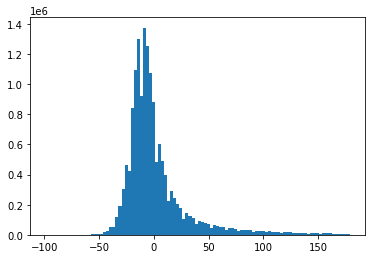

In [85]:
plt.hist(y[(y<180) & (y>-100)],bins=100)

### Table **flights_test**

total number of records: 660556
total columns: 20
fl_date: 2020-1-1 to 2020-01-31
crs_elapsed_time mean : 144.95
distance mean: 795


In [27]:
sql = 'select * from flights_test limit 100'

In [28]:
df_test = pd.read_sql(sql,con)

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fl_date             100 non-null    datetime64[ns]
 1   mkt_unique_carrier  100 non-null    object        
 2   branded_code_share  100 non-null    object        
 3   mkt_carrier         100 non-null    object        
 4   mkt_carrier_fl_num  100 non-null    int64         
 5   op_unique_carrier   100 non-null    object        
 6   tail_num            100 non-null    object        
 7   op_carrier_fl_num   100 non-null    int64         
 8   origin_airport_id   100 non-null    int64         
 9   origin              100 non-null    object        
 10  origin_city_name    100 non-null    object        
 11  dest_airport_id     100 non-null    int64         
 12  dest                100 non-null    object        
 13  dest_city_name      100 non-null    object        


In [30]:
df_test

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
